**PARTE 1: DESENVOLVIMENTO PIPELINE/NOTEBOOK**

***Instalação e importação das bibliotecas***

In [8]:
%pip install pandas
%pip install IPython  #usada para exibir a foto do diagrama dimensional
%pip install pyarrow #usado para interagir com arquivos no formato parquet
%pip install fastparquet

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#usada'


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#usado'


   ---------------------------------------- 0.0/670.5 kB ? eta -:--:--
   - ------------------------------------- 30.7/670.5 kB 660.6 kB/s eta 0:00:01
   - ------------------------------------- 30.7/670.5 kB 660.6 kB/s eta 0:00:01
   -- ------------------------------------ 41.0/670.5 kB 326.8 kB/s eta 0:00:02
   ----- --------------------------------- 92.2/670.5 kB 585.1 kB/s eta 0:00:01
   ----- --------------------------------- 92.2/670.5 kB 585.1 kB/s eta 0:00:01
   -------- ----------------------------- 143.4/670.5 kB 532.5 kB/s eta 0:00:01
   -------- ----------------------------- 143.4/670.5 kB 532.5 kB/s eta 0:00:01
   ------------- ------------------------ 245.8/670.5 kB 656.0 kB/s eta 0:00:01
   -------------- ----------------------- 256.0/670.5 kB 630.2 kB/s eta 0:00:01
   --------------- ---------------------- 276.5/670.5 kB 609.2 kB/s eta 0:00:01
   ---------------- --------------------- 286.7/670.5 kB 553.0 kB/s eta 0:00:01
   ---------------- --------------------- 286.7/6

In [36]:
import pandas as pd
#Importação dos módulos Image e display da biblioteca IPython.display para exibição de imagens
from IPython.display import display, Image

***Importação do arquivo CSV para um DataFrame***

In [37]:
#Caminho para o diretório do lakehouse
path = "C:/Users/biaar/OneDrive/Documents/DWE_LAKEHOUSE"

In [38]:
#Lê o arquivo .csv, usando o separador "," e a codificação "utf-8"
df_original = pd.read_csv(path + "/BRONZE/Vendas.csv", encoding="utf-8", sep=",")

#Exibe as primeiras linhas do DataFrame resultante para visualização
df_original.head()

,IDProduto,Data,IDCliente,IDCampanha,Unidades,Produto,Categoria,Segmento,IDFabricante,Fabricante,CustoUnitario,PrecoUnitario,CodigoPostal,EmailNome,Cidade,Estado,Regiao,Distrito,Pais
0,449,2012-07-26 00:00:00.000,247546,22,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,33194,"(Nerea.Barry@xyza.com): Barry, Nerea","Miami, FL, USA",FL,East,District #10,USA
1,449,2013-10-31 00:00:00.000,124593,22,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,33177,"(Elliott.Stuart@xyza.com): Stuart, Elliott","Miami, FL, USA",FL,East,District #10,USA
2,449,2013-11-14 00:00:00.000,163517,22,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,33172,"(Holmes.Swanson@xyza.com): Swanson, Holmes","Miami, FL, USA",FL,East,District #10,USA
3,449,2013-01-17 00:00:00.000,8875,18,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,33169,"(Nyssa.Solis@xyza.com): Solis, Nyssa","Miami, FL, USA",FL,East,District #10,USA
4,449,2014-09-13 00:00:00.000,8894,21,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,33169,"(Ivana.Wall@xyza.com): Wall, Ivana","Miami, FL, USA",FL,East,District #10,USA


***Exibição do diagrama conceitual do modelo***

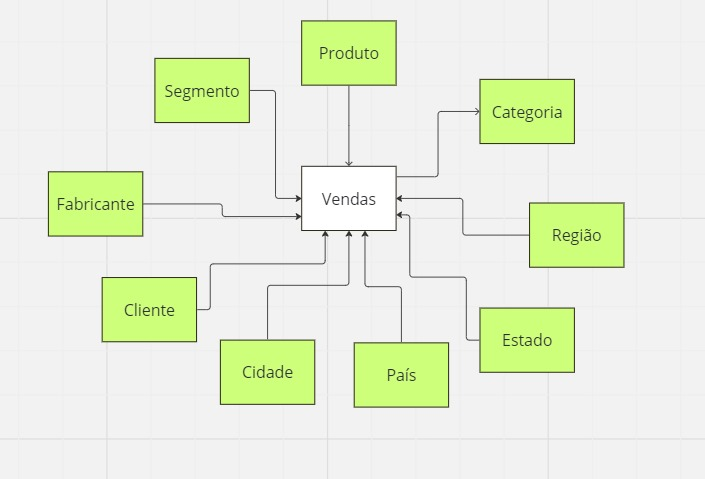

In [4]:
#Exibe o diagrama conceitual sobre a modelagem dimensional relacionado ao arquivo Vendas.csv
display(Image(filename=f"{path}/diagrama_conceitual_vendas.jpg"))

***Preparação dos dados para a camada Silver***

*Alterações gerais sobre o DataFrame original: formatação e remoção de colunas*

In [39]:

#Separa o e-mail do nome na coluna Cliente e mantém apenas o nome
df_original['Cliente'] = df_original['EmailNome'].str.split(': ', expand=True)[1]

#Formata o campo Cliente para "Nome Sobrenome"
df_original['Cliente'] = df_original['Cliente'].str.split(', ').str[::-1].str.join(' ')

#Mantém apenas o nome da cidade na coluna Cidade
df_original['Cidade'] = df_original['Cidade'].str.split(',').str[0]

#Converte a coluna 'Data' para o tipo datetime
df_original['Data'] = pd.to_datetime(df_original['Data'])

#Elimina as colunas IDCampanha, distrito, código postal e a coluna EmailNome, já que a informação do e-mail do cliente não será mais usada
df_original.drop(['IDCampanha', 'Distrito', 'CodigoPostal', 'EmailNome'], axis=1, inplace=True)

#Exibe as primeiras linhas do DataFrame resultante para verificar as transformações aplicadas
df_original.head()


,IDProduto,Data,IDCliente,Unidades,Produto,Categoria,Segmento,IDFabricante,Fabricante,CustoUnitario,PrecoUnitario,Cidade,Estado,Regiao,Pais,Cliente
0,449,2012-07-26,247546,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Nerea Barry
1,449,2013-10-31,124593,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Elliott Stuart
2,449,2013-11-14,163517,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Holmes Swanson
3,449,2013-01-17,8875,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Nyssa Solis
4,449,2014-09-13,8894,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Ivana Wall


In [40]:
#Salva a tabela vendas transformada no formato parquet
df_original.to_parquet(f"{path}/SILVER/Vendas_transformadas.parquet")

*Criação das tabelas dimensões sem as SKs: Produto, Categoria, Segmento, Fabricante, Cliente (nome), Cidade, Estado, Região, País*

In [41]:
#Lista de dimensões que serão criadas
dimensoes = ['Produto', 'Categoria', 'Segmento', 'Fabricante', 'Cidade', 'Estado', 'Regiao', 'Pais', 'Cliente']

#Lista das colunas que compõem cada tabela dimensão
#Algumas tabelas possuem uma coluna adicional para ID, quando necessário
colunas_dimensoes = [["IDProduto", "Produto"], ["Categoria"], ["Segmento"], ["IDFabricante", "Fabricante"],
                      ["Cidade"], ["Estado"], ["Regiao"], ["Pais"], ["IDCliente", "Cliente"]]

#Dicionário para armazenar os DataFrames das dimensões
dfs_dimensoes = {}

#Loop sobre cada dimensão
for dimensao, cols_dimensao in zip(dimensoes, colunas_dimensoes):
    #Seleciona as colunas da dimensão no DataFrame original e remove linhas duplicadas
    df_dimensao = df_original[cols_dimensao].drop_duplicates(subset=cols_dimensao)

    #Redefine os índices do DataFrame, todos assumem valor 0
    df_dimensao.index = [0]*len(df_dimensao)

    #Adiciona o DataFrame da dimensão ao dicionário
    dfs_dimensoes[dimensao] = df_dimensao

#Visualiza os DataFrames criados para as futuras tabelas dimensões e os salva no formato parquet
for dimensao, df_dimensao in dfs_dimensoes.items():
    #Salva o DataFrame no formato parquet
    df_dimensao.to_parquet(f"{path}/SILVER/d_{dimensao}.parquet")
    #Exibe o DataFrame para visualização
    print(df_dimensao)


    IDProduto        Produto
0         449  Maximus UM-54
0         470  Maximus UM-75
0         496  Maximus UM-01
0         457  Maximus UM-62
0         433  Maximus UM-38
..        ...            ...
0         398  Maximus UM-03
0         405  Maximus UM-10
0         406  Maximus UM-11
0         402  Maximus UM-07
0         407  Maximus UM-12

[212 rows x 2 columns]
   Categoria
0      Urban
0        Mix
0      Youth
0      Rural
0  Accessory
       Segmento
0    Moderation
0   Convenience
0       Extreme
0       Regular
0    All Season
0  Productivity
0         Youth
0        Select
0     Accessory
   IDFabricante Fabricante
0             7  VanArsdel
              Cidade
0              Miami
0    Fort Lauderdale
0   Port Saint Lucie
0         Fort Myers
0              Tampa
..               ...
0          Sassafras
0            Mayking
0            Gunlock
0         Clairfield
0       Apalachicola

[14517 rows x 1 columns]
  Estado
0     FL
0     OH
0     PA
0     NY
0     MI
0   

***Preparação dos dados para a camada Gold***

*Adiciona as surrogate keys às tabelas dimensões*

In [42]:
#Lista que salva o nome de cada surrogate key
SKs = []

#Loop sobre cada tabela dimensão
for dimensao, df_dimensao in dfs_dimensoes.items():
    #Adiciona o nome da surrogate key na lista
    sk_nome = f"SK_{dimensao.upper()}"
    SKs.append(sk_nome)
    
    #Inclui a surrogate key na tabela dimensão
    df_dimensao[sk_nome] = range(1, len(df_dimensao) + 1)
    
    #Salva a tabela dimensão já pronta no formato parquet na camada Gold
    df_dimensao.to_parquet(f"{path}/GOLD/d_{dimensao}.parquet")

*Função que aplica o método SCD1 sobre tabelas dimensão - deve ser executada sempre que os dados da tabela forem modificados*

In [43]:
#Na aplicação da SCD1 os dados novos são sobrescritos sobre os dados originais
#Então a aplicação do SCD1 baseia-se na identificação de modificacões sobre os dados originais e na sobrescrecrição dos dados novos

def aplicar_SCD1(df_dimensao_original, df_dimensao_modificado, dimensao):
    """
    Aplica o método Slowly Changing Dimension 1 (SCD1) às tabelas de dimensão.

    Paramêtros:
    df_dimensao_original (DataFrame): O DataFrame contendo os dados originais da tabela dimensão.
    df_dimensao_modificado (DataFrame): O DataFrame contendo os dados de uma tabela dimensão com alguma modificação.
    dimensao (string): Uma string que representa a chave da tabela dimensão.

    Retorna:
    DataFrame: Um dataframe com os dados atualizados após a aplicação do SCD1.
    """
    #Cria uma cópia do DataFrame original para evitar alterações indevidas
    df_dimensao_atualizado = df_dimensao_original.copy()

    #Variável que recebe o nome da surrogate key da dimensão
    sk = f"SK_{dimensao.upper()}"

    #Compara os DataFrames usando a surrogate key da dimensão
    for _, linha in df_dimensao_modificado.iterrows():
        sk_linha = linha[sk]
        #Verifica se a chave existe no DataFrame original
        if sk_linha in df_dimensao_atualizado[sk].values:
            #Seleciona a linha correspondente no DataFrame original
            linha_original = df_dimensao_atualizado[(df_dimensao_atualizado[sk] == sk_linha)].iloc[0]
            #Compara os valores dos atributos
            if not linha_original.equals(linha):
                #Sobrescreve os dados originais com os dados modificados
                df_dimensao_atualizado[(df_dimensao_atualizado[sk] == sk_linha)] = linha
        else:
            #Se a chave não existe no DataFrame original, adiciona o novo registro
            df_dimensao_atualizado.loc[len(df_dimensao_atualizado)] = linha

            #Mantém os indexes do df zerados após a inserção
            df_dimensao_atualizado.index = [0]*len(df_dimensao_atualizado)

    return df_dimensao_atualizado



*Criação da tabela fato - adiciona-se as SKs, por meio da junção do dataframe original com as tabelas dimensão, em seguida cria-se as colunas das métricas e, por fim, remove-se as colunas que não irão compor a fato, mas faziam parte do df original.*

In [44]:
#DataFrame temporário para a tabela fato, inicialmente é uma cópia do DataFrame original
df_temp = df_original

#Loop sobre cada tabela dimensão e suas colunas correspondentes
for dimensao, df_dimensao, colunas in zip(dfs_dimensoes.keys(), dfs_dimensoes.values(), colunas_dimensoes):
    #Junta as colunas da tabela original com as tabelas dimensões utilizando left join
    df_temp = df_temp.merge(df_dimensao, on=str(colunas[0]), how='left')

#Seleciona as colunas que vão ser usadas para compor a tabela fato
df_temp = df_temp[SKs + ["Data", "CustoUnitario", "PrecoUnitario", "Unidades"]]

#Define as colunas para as métricas
df_temp["TotalCusto"] = df_temp["CustoUnitario"] * df_temp["Unidades"]
df_temp["TotalVendas"] = df_temp["PrecoUnitario"] * df_temp["Unidades"]
df_temp['TotalUnidades'] = df_temp['Unidades']
df_temp["TotalLucro"] = df_temp["TotalVendas"] - df_temp["TotalCusto"]

#Remove as colunas que não serão usadas na tabela fato
df_temp.drop(["CustoUnitario", "PrecoUnitario", "Unidades"], axis=1, inplace=True)

#Exibe uma porção do DataFrame temporário da tabela fato para visualização
df_temp.head()


,SK_PRODUTO,SK_CATEGORIA,SK_SEGMENTO,SK_FABRICANTE,SK_CIDADE,SK_ESTADO,SK_REGIAO,SK_PAIS,SK_CLIENTE,Data,TotalCusto,TotalVendas,TotalUnidades,TotalLucro
0,1,1,1,1,1,1,1,1,1,2012-07-26,74.729917,102.36975,1,27.639832
1,1,1,1,1,1,1,1,1,2,2013-10-31,74.729917,102.36975,1,27.639832
2,1,1,1,1,1,1,1,1,3,2013-11-14,74.729917,102.36975,1,27.639832
3,1,1,1,1,1,1,1,1,4,2013-01-17,74.729917,102.36975,1,27.639832
4,1,1,1,1,1,1,1,1,5,2014-09-13,74.729917,102.36975,1,27.639832


*Particionamento dos arquivos parquet da tabela fato em ano e mês*

In [45]:
# Adiciona colunas de Ano e Mês com base na coluna Data
df_temp["Ano"] = df_temp["Data"].dt.year
df_temp["Mes"] = df_temp["Data"].dt.month

# Salva a tabela fato no formato parquet e a particiona em ano e mês
df_temp.to_parquet(f"{path}/GOLD/f_vendas/f_vendas.parquet", partition_cols=["Ano", "Mes"])


**PARTE 2**

***Preparação do ambiente e das variáveis que serão usadas na parte 2 do desafio***

In [3]:
import pandas as pd

In [46]:
#Carrega em dataframes apenas as tabelas que serão usadas nos exercícios
df_f_vendas = pd.read_parquet(f"{path}/GOLD/f_vendas") #tabela fato vendas
df_d_segmento = pd.read_parquet(f"{path}/GOLD/d_Segmento.parquet") #tabela dimensão segmento
df_d_fabricante = pd.read_parquet(f"{path}/GOLD/d_Fabricante.parquet") #tabela dimensão fabricante
df_d_produto = pd.read_parquet(f"{path}/GOLD/d_Produto.parquet") #tabela dimensão produto

***Exercício 1: Qual o total de Vendas em Fev/2014 para cada Fabricante?***

*Abordagem: filtra-se a tabela fato Vendas pelas colunas de ano e mês, junta-se a tabela filtrada com a tabela dimensão Fabricante e na tabela resultante aplica-se um agrupamento a partir da coluna "Fabricante" e calcula-se o total de vendas para cada fabricante por meio da soma dos valores da coluna "TotalVendas"*

In [48]:
#Cria um DataFrame que contem as vendas em fevereiro de 2014
f_vendas_fev_2014 = df_f_vendas[(df_f_vendas["Ano"] == 2014) & (df_f_vendas["Mes"] == 2)]

#Junta a tabela fato de vendas com a tabela dimensão de fabricante usando a coluna SK_FABRICANTE
f_vendas_fev_2014_c_fabricante = f_vendas_fev_2014.merge(df_d_fabricante, on="SK_FABRICANTE", how="left")

#Agrupa os dados pelo nome do fabricante e calcula o total de vendas para cada fabricante
total_vendas_por_fabricante_fev_2014 = f_vendas_fev_2014_c_fabricante.groupby(["Fabricante", "IDFabricante"])["TotalVendas"].sum()

#Formata os valores para saírem com o símbolo de moeda R$ e separadores de milhar e decimal
total_vendas_por_fabricante_fev_2014 = total_vendas_por_fabricante_fev_2014.map('R${:,.2f}'.format)

#Exibe o total de vendas para cada fabricante
print(total_vendas_por_fabricante_fev_2014)


Fabricante  IDFabricante
VanArsdel   7               R$817,548.38
Name: TotalVendas, dtype: object


***Exercício 2: Quais os top 10 Produtos referente a Jan/2014 em Total de custo (R$) ?***

*Abordagem: filtra-se a tabela fato Vendas pelas colunas de ano e mês, junta-se a tabela filtrada com a tabela dimensão Produto e na tabela resultante aplica-se um agrupamento a partir das colunas "IDProduto" e "Produto", visto que produtos com o mesmo nome podem ter identificadores diferentes. O total de custo para cada produto é calculado através da soma dos valores da coluna "TotalCusto". Para obter os top 10, ordena-se a tabela de custo, em ordem decrescente, e seleciona-se os 10 primeiros elementos.*

In [49]:
#Cria um DataFrame que contém as vendas de janeiro de 2014
f_vendas_jan_2014 = df_f_vendas[(df_f_vendas["Ano"] == 2014) & (df_f_vendas["Mes"] == 1)]

#Junta a tabela fato vendas com a tabela dimensão produtos por meio do SK_PRODUTO por left join
f_vendas_jan_2014_c_produto = f_vendas_jan_2014.merge(df_d_produto, on="SK_PRODUTO", how="left")

#Agrupa pelo id do produto e calcula o total de custo para cada produto
custo_por_produto_jan_2014 = f_vendas_jan_2014_c_produto.groupby(["IDProduto", "Produto"])["TotalCusto"].sum()


# Ordena os produtos pelo total de custo em ordem decrescente
custo_por_produto_jan_2014 = custo_por_produto_jan_2014.sort_values(ascending=False)

#Formata os valores para saírem com o símbolo de moeda R$ e separadores de milhar e decimal
custo_por_produto_jan_2014 = custo_por_produto_jan_2014.apply(lambda x: f"R${x:,.2f}")

#Seleciona os top 10 produtos com base no total de custo
custo_por_produto_jan_2014.head(10)


IDProduto  Produto      
449        Maximus UM-54    R$70,096.66
506        Maximus UM-11    R$37,329.66
470        Maximus UM-75    R$31,162.38
407        Maximus UM-12    R$20,338.41
408        Maximus UM-13    R$18,832.18
505        Maximus UM-10    R$18,012.27
461        Maximus UM-66    R$17,632.51
451        Maximus UM-56    R$17,420.39
428        Maximus UM-33    R$15,003.57
421        Maximus UM-26    R$13,865.57
Name: TotalCusto, dtype: object

***Exercício 3: Qual o total de vendas no 1º Trimestre/2014 por Segmento?***

*Abordagem: filtra-se a tabela fato Vendas pelas colunas de ano e mês, onde são selecionados os dados referentes aos 3 primeiros meses do ano (1º trimestre), junta-se a tabela filtrada com a tabela dimensão Segmento e na tabela resultante aplica-se um agrupamento a partir da coluna "Segmento". O total de vendas para cada segmento é calculado através da soma dos valores da coluna "TotalVendas". Adicionalmente, verifica-se se houve algum segmento que não foi abordado na tabela do total de vendas por segmento, por não tem vendido nada durante nesse intervalo. Nesse caso, esses segmentos são adicionados à tabela com o valor de total de vendas igual a zero, para fornecer uma melhor visualização geral sobre o desempenho de todos os segmentos.*

In [50]:
#Cria um DataFrame que contém as vendas do 1º trimestre de 2014
f_vendas_2014_1st_tri = df_f_vendas[(df_f_vendas["Ano"] == 2014) & (df_f_vendas["Mes"].isin(range(1, 4)))]

#Dataframe que contém o nome de cada segmento
nomes_segmentos = df_d_segmento["Segmento"]

#Junta a tabela com as vendas do 1º trimestre de 2014 e a tabela de segmento
f_vendas_2014_1st_tri_c_segmento = f_vendas_2014_1st_tri.merge(df_d_segmento, on="SK_SEGMENTO", how="left")

#Agrupa pelo segmento e calcula o total de vendas do primeiro trimestre de 2014
total_vendas_2014_1st_tri_por_segmento = f_vendas_2014_1st_tri_c_segmento.groupby("Segmento")["TotalVendas"].sum()

#Verifica quais segmentos não estão presentes no total de vendas por segmento
segmentos_faltantes = set(nomes_segmentos) - set(total_vendas_2014_1st_tri_por_segmento.index)

#Adiciona os segmentos faltantes com valor zero em total_vendas_2014_1st_tri_por_segmento
for segmento in segmentos_faltantes:
    total_vendas_2014_1st_tri_por_segmento[segmento] = 0.0

#Ordena o índice em ordem alfabética
total_vendas_2014_1st_tri_por_segmento = total_vendas_2014_1st_tri_por_segmento.sort_index()

#Formata os valores para saírem com o símbolo de moeda R$ e separadores de milhar e decimal
total_vendas_2014_1st_tri_por_segmento = total_vendas_2014_1st_tri_por_segmento.map('R${:,.2f}'.format)

#Exibe o total de vendas do 1º trimestre de 2014 por segmento
print(total_vendas_2014_1st_tri_por_segmento)

Segmento
Accessory         R$242,534.18
All Season         R$42,199.04
Convenience       R$507,722.51
Extreme               R$118.07
Moderation      R$1,754,029.98
Productivity       R$65,403.39
Regular                R$48.25
Select                  R$0.00
Youth              R$76,074.84
Name: TotalVendas, dtype: object


***Exercício 4: Quais as Top 5 Segmentos em 2014 sobre o total de Vendas(R$)?***

*Abordagem: filtra-se a tabela fato Vendas pela coluna de ano, junta-se a tabela filtrada com a tabela dimensão Segmento e na tabela resultante aplica-se um agrupamento a partir da coluna "Segmento". O total de vendas para cada segmento é calculado através da soma dos valores da coluna "TotalVendas". Para obter os top 5, ordena-se a tabela de vendas, em ordem decrescente, e seleciona-se os 5 primeiros elementos.*

In [18]:
#Cria um DataFrame que contém as vendas de 2014
f_vendas_2014 = df_f_vendas[(df_f_vendas["Ano"] == 2014)]

#Junta o dataframe das vendas de 2014 com o tabela de segmentos por meio da SK_SEGMENTO e left join
f_vendas_2014_c_segmento = f_vendas_2014.merge(df_d_segmento, on="SK_SEGMENTO", how="left")

#Agrupa as linhas por segmento e calcula o total de vendas para cada
total_vendas_2014_por_segmento = f_vendas_2014_c_segmento.groupby("Segmento")["TotalVendas"].sum()

#Ordena pelo Total de vendas em ordem decrescente
total_vendas_2014_por_segmento = total_vendas_2014_por_segmento.sort_values(ascending=False)

#Formata os valores do total de vendas para saírem com o símbolo de moeda R$ e separadores de milhar e decimal
total_vendas_2014_por_segmento = total_vendas_2014_por_segmento.map('R${:,.2f}'.format)

##Seleciona e exibe os top 5 segmentos com base no total de vendas
total_vendas_2014_por_segmento.head()

Segmento
Moderation      R$8,339,859.84
Convenience     R$2,489,628.78
Accessory       R$1,335,307.12
Productivity      R$376,421.50
Youth             R$322,936.25
Name: TotalVendas, dtype: object

***Exercício 5: Qual o Total de Vendas(R$) mês a mês em 2014?***

*Abordagem: filtra-se a tabela fato Vendas pela coluna de ano e na tabela resultante aplica-se um agrupamento a partir da coluna "Mes". O total de vendas para cada mês é calculado através da soma dos valores da coluna "TotalVendas". Para facilitar a análise, os índices da coluna mês, originalmente em formato inteiro, são substituídos pelos nomes dos meses.*

In [19]:
#Cria um dataframe que contém as vendas de 2014
f_vendas_2014 = df_f_vendas[(df_f_vendas["Ano"] == 2014)]

# Dicionário que mapeia o número do mês para o nome do mês
meses = {
    1: "Janeiro",
    2: "Fevereiro",
    3: "Março",
    4: "Abril",
    5: "Maio",
    6: "Junho",
    7: "Julho",
    8: "Agosto",
    9: "Setembro",
    10: "Outubro",
    11: "Novembro",
    12: "Dezembro"
}

#Agrupa os dados pelo mês e calcula o total de vendas para cada mês
vendas_2014_mes_a_mes = f_vendas_2014.groupby("Mes")["TotalVendas"].sum()

# Mapeia os números dos meses para os seus respectivos nomes
vendas_2014_mes_a_mes.index = vendas_2014_mes_a_mes.index.map(meses)

#Formata os valores do total de vendas para saírem com o símbolo de moeda R$ e separadores de milhar e decimal
vendas_2014_mes_a_mes = vendas_2014_mes_a_mes.map('R${:,.2f}'.format)

print(vendas_2014_mes_a_mes)

Mes
Janeiro        R$624,955.34
Fevereiro      R$817,548.38
Março        R$1,245,626.53
Abril        R$1,400,953.69
Maio         R$1,510,562.61
Junho        R$1,481,389.20
Julho        R$1,281,465.32
Agosto       R$1,273,947.55
Setembro     R$1,201,761.72
Outubro        R$916,773.19
Novembro       R$714,020.90
Dezembro       R$575,280.89
Name: TotalVendas, dtype: object


***Exercício 6: Qual o total de Lucro mês a mês em 2014?***

*Abordagem: filtra-se a tabela fato Vendas pela coluna de ano e na tabela resultante aplica-se um agrupamento a partir da coluna "Mes". O total de lucro para cada mês é calculado através da soma dos valores da coluna "TotalLucro". Para facilitar a análise, os índices da coluna mês, originalmente em formato inteiro, são substituídos pelos nomes dos meses.*

In [29]:
#Cria um dataframe que contém as vendas de 2014
f_vendas_2014 = df_f_vendas[(df_f_vendas["Ano"] == 2014)]

# Dicionário que mapeia o número do mês para o nome do mês
meses = {
    1: "Janeiro",
    2: "Fevereiro",
    3: "Março",
    4: "Abril",
    5: "Maio",
    6: "Junho",
    7: "Julho",
    8: "Agosto",
    9: "Setembro",
    10: "Outubro",
    11: "Novembro",
    12: "Dezembro"
}

#Agrupa os dados pelo mês e calcula o total de lucro para cada mês
total_lucro_2014_mes_a_mes = f_vendas_2014.groupby("Mes")["TotalLucro"].sum()

# Mapeia os números dos meses para os seus respectivos nomes
total_lucro_2014_mes_a_mes.index = total_lucro_2014_mes_a_mes.index.map(meses)

#Formata os valores do total de vendas para saírem com o símbolo de moeda R$ e separadores de milhar e decimal
total_lucro_2014_mes_a_mes = total_lucro_2014_mes_a_mes.map('R${:,.2f}'.format)

print(total_lucro_2014_mes_a_mes)

Mes
Janeiro      R$168,737.94
Fevereiro    R$220,738.06
Março        R$336,319.16
Abril        R$378,257.50
Maio         R$407,851.91
Junho        R$399,975.08
Julho        R$345,995.64
Agosto       R$343,965.84
Setembro     R$324,475.66
Outubro      R$247,528.76
Novembro     R$192,785.64
Dezembro     R$155,325.84
Name: TotalLucro, dtype: object


***Exercício 7: Qual a variação %(MoM) de Total de vendas (R$) de Mar/2014 para Fev/2014 por Segmento.***

*Abordagem: filtra-se a tabela fato Vendas pelas colunas de ano e mês, onde são selecionados os dados referentes aos meses 2 e 3, e junta-se a tabela filtrada com a tabela dimensão Segmento. A tabela filtrada é divida em 2, as quais possuem as vendas de fevereiro e as de março. Para cada tabela, calcula-se o total de vendas através da soma dos valores da coluna "TotalVendas". Para obter a variação %(MoM) sobre o total de vendas por segmento entre mar/2014 e fev/2014, calcula-se o 100x(total vendas mar - total vendas fev)/(total vendas fev) para cada segmento. Há segmentos que vão apresentar %(MoM) NaN, pois possuem (total vendas fev) = 0, então substitui-se os valores NaN por 0. Adicionalmente, verifica-se se houve algum segmento que não foi abordado na tabela de %(MoM). Nesse caso, esses segmentos são adicionados à tabela com o valor de variação %(MoM) igual a zero, para fornecer uma melhor visualização geral sobre o desempenho de todos os segmentos.*

In [30]:
#Cria um dataframe que contém as vendas de fevereiro e de março de 2014
f_vendas_fev_mar_2014 = df_f_vendas[(df_f_vendas["Ano"] == 2014) & (df_f_vendas["Mes"].isin([2, 3]))]

#Junta o dataframe criado acima com a tabela segmento a partir do SK_SEGMENTO usando left join
f_vendas_fev_mar_2014_c_segmento = f_vendas_fev_mar_2014.merge(df_d_segmento, on="SK_SEGMENTO", how="left")

#Separa os dados por mês - fevereiro e março
f_vendas_fev_2014_c_segmento = f_vendas_fev_mar_2014_c_segmento[(f_vendas_fev_mar_2014_c_segmento["Mes"] == 2)]
f_vendas_mar_2014_c_segmento = f_vendas_fev_mar_2014_c_segmento[(f_vendas_fev_mar_2014_c_segmento["Mes"] == 3)]

#Agrupa por segmento e calcula o total de vendas para cada mês
total_vendas_fev_2014_por_segmento = f_vendas_fev_2014_c_segmento.groupby("Segmento")["TotalVendas"].sum()
total_vendas_mar_2014_por_segmento = f_vendas_mar_2014_c_segmento.groupby("Segmento")["TotalVendas"].sum()

#Calcula a variação percentual mês a mês (MoM) do total de vendas por segmento
variacao_mom_por_segmento = ((total_vendas_mar_2014_por_segmento - total_vendas_fev_2014_por_segmento)/total_vendas_fev_2014_por_segmento)*100

#Substitui os valores NaN, gerados quando total_vendas_fev_2014_por_segmento = 0, por zero
variacao_mom_por_segmento = variacao_mom_por_segmento.fillna(0)

#Dataframe que contém o nome de cada segmento
nomes_segmentos = df_d_segmento["Segmento"]

#Verifica quais segmentos não estão presentes em variacao_mom_por_segmento
segmentos_faltantes = set(nomes_segmentos) - set(variacao_mom_por_segmento.index)

#Adiciona os segmentos faltantes com valor zero em variacao_mom_por_segmento
for segmento in segmentos_faltantes:
    variacao_mom_por_segmento[segmento] = 0.0

#Ordena o índice em ordem alfabética
variacao_mom_por_segmento = variacao_mom_por_segmento.sort_index()

#Formata o valor da variação mom
variacao_mom_por_segmento = variacao_mom_por_segmento.apply(lambda x: "{:.2f}%".format(x))

#Exibe a variação percentual do total de vendas por segmento entre os meses de fevereiro e março
print(variacao_mom_por_segmento)

Segmento
Accessory       45.89%
All Season      29.79%
Convenience     66.81%
Extreme          0.00%
Moderation      49.64%
Productivity    68.40%
Regular          0.00%
Select           0.00%
Youth           44.23%
Name: TotalVendas, dtype: object


***Exercício 8: Retorne o maior Valor de custos (R$) e seu respectivo segmento em Fev/2014.***

*Abordagem: filtra-se a tabela fato Vendas pelas colunas de ano e mês. Calcula-se o maior valor de custo nesse conjunto de dados a partir do uso da função max sobre a coluna "TotalCusto", usa-se esse valor para delimitar os segmentos associados à ele, por meio da surrogate key. A partir dos valores das surrogate keys e da tabela dimensão Segmento, descobre-se os nomes dos segmentos que apresentaram o maior valor de custo em fev/2014.*

In [31]:
#Cria um dataframe que contempla as vendas em fevereiro de 2014
vendas_fev_2014 = df_f_vendas[(df_f_vendas["Ano"] == 2014) & (df_f_vendas["Mes"] == 2)]

#Define o maior valor de custo em fevereiro de 2014
maior_custo_fev_2014 = vendas_fev_2014["TotalCusto"].max()

#Descobre qual é a surrogate key do segmento que possui o maior valor de custo em fev/2014
#Cria uma lista com todas as sk's associadas à esse valor
sk_maior_custo = vendas_fev_2014[(vendas_fev_2014["TotalCusto"] == maior_custo_fev_2014)]["SK_SEGMENTO"].unique()

#Exibe o maior valor de custos em fev/2014
print(f"Maior valor de custos em fev/2014: R${maior_custo_fev_2014:,.2f}")

print("Segmento(s) associado(s) ao maior valor de custos:")
#Exibe o(s) segmento(s) que relaciona(m)-se com esse valor
for sk in sk_maior_custo:
    #Acessa o nome do segmento associado à sk
    segmento = df_d_segmento[(df_d_segmento["SK_SEGMENTO"] == sk)]["Segmento"]
    print(segmento[0])



Maior valor de custos em fev/2014: R$147.93
Segmento(s) associado(s) ao maior valor de custos:
Moderation


***Exercício 9: Retorne o % (Share) de Total de vendas (R$), por Segmento em Fev/2014.***

*Abordagem: filtra-se a tabela fato Vendas pelas colunas de ano e de mês, junta-se a tabela filtrada com a tabela dimensão Segmento e na tabela resultante aplica-se um agrupamento a partir da coluna "Segmento". O total de vendas por segmento é calculado através da soma dos valores da coluna "TotalVendas" e por meio dele calcula-se o %(share) de cada segmento: 100x(total vendas segmento)/(total vendas todos segmentos). Adicionalmente, verifica-se se houve algum segmento que não foi abordado na tabela de %(share). Nesse caso, esses segmentos são adicionados à tabela com o valor de variação %(share) igual a zero, para fornecer uma melhor visualização geral sobre o desempenho de todos os segmentos.*

In [32]:
#Cria dataframe que contém as vendas de fevereiro de 2014
vendas_fev_2014 = df_f_vendas[(df_f_vendas["Ano"] == 2014) & (df_f_vendas["Mes"] == 2)]

#Junta o df com a tabela de segmento por meio da sk_segmento
vendas_fev_2014_c_segmento = vendas_fev_2014.merge(df_d_segmento, on="SK_SEGMENTO", how="left")

#Agrupa os dados pelo Segmento e calcula o total de vendas por segmento
total_vendas_por_segmento = vendas_fev_2014_c_segmento.groupby("Segmento")["TotalVendas"].sum()

#Calcula o share total de vendas por segmento (em porcentagem)
share_total_vendas_por_segmento = (total_vendas_por_segmento/total_vendas_por_segmento.sum())*100

#Dataframe que contém o nome de cada segmento
nomes_segmentos = df_d_segmento["Segmento"]

#Verifica quais segmentos não estão presentes em share_total_vendas_por_segmento
segmentos_faltantes = set(nomes_segmentos) - set(share_total_vendas_por_segmento.index)

#Adiciona os segmentos faltantes com valor zero em share_total_vendas_por_segmento
for segmento in segmentos_faltantes:
    share_total_vendas_por_segmento[segmento] = 0.0

#Formata o share de vendas
share_total_vendas_por_segmento = share_total_vendas_por_segmento.apply(lambda x: f"{x:.2f}%")

#Exibe o share total de vendas por segmento em fev/2014
print(share_total_vendas_por_segmento)


Segmento
Accessory        9.26%
All Season       1.71%
Convenience     18.13%
Moderation      65.51%
Productivity     2.41%
Youth            2.99%
Regular          0.00%
Select           0.00%
Extreme          0.00%
Name: TotalVendas, dtype: object


***Exercício 10: Retorne o valor médio de Total de vendas Mês a Mês por segmento no ano de 2014.***

*Abordagem: filtra-se a tabela fato Vendas pela coluna de ano, junta-se a tabela filtrada com a tabela dimensão Segmento e na tabela resultante aplica-se um agrupamento a partir das colunas "Segmento". O valor médio do total de vendas mês a mês por segmento é calculado através da média dos valores da coluna "TotalVendas".*

In [33]:
#Cria um dataframe que contém as vendas de 2014
vendas_2014 = df_f_vendas[(df_f_vendas["Ano"] == 2014)]

#Junta o df com a tabela de segmento por meio da sk_segmento
vendas_2014_c_segmento = vendas_2014.merge(df_d_segmento, on="SK_SEGMENTO", how="left")

#Calcula a média do total de vendas mês a mês por segmento
#Agrupa os dados por Mês e Segmento e calcula a média das vendas para cada grupo
media_vendas_por_segmento_mes = vendas_2014_c_segmento.groupby(["Mes", "Segmento"])["TotalVendas"].mean()

#Substitui valores NaN (Not a Number) por 0.0
media_vendas_por_segmento_mes = media_vendas_por_segmento_mes.fillna(0.0)

#Formata o valor da média do total de vendas
media_vendas_por_segmento_mes = media_vendas_por_segmento_mes.apply(lambda x: f"R${x:,.2f}")

#Exibe o valor médio do total de vendas mês a mês por segmento para 2014
print(media_vendas_por_segmento_mes)


Mes  Segmento    
1    Accessory       R$138.10
     All Season       R$71.11
     Convenience      R$73.70
     Extreme          R$59.04
     Moderation      R$116.08
                       ...   
12   Extreme           R$0.00
     Moderation      R$115.53
     Productivity     R$75.84
     Regular           R$0.00
     Youth            R$76.98
Name: TotalVendas, Length: 96, dtype: object
